In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

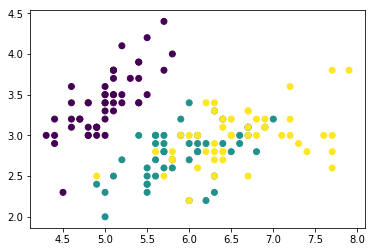

In [17]:
#使用sepal花萼的长度和宽度绘制散点图
spcies = iris.target
plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)
plt.show()

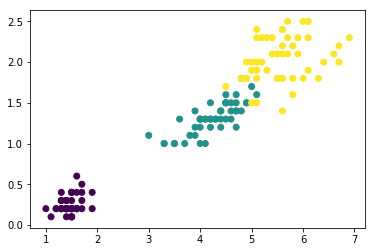

In [18]:
#花瓣
spcies = iris.target
plt.scatter(iris.data[:,2],iris.data[:,3],c=iris.target)
plt.show()

In [27]:
#主成分分析PCA principal Component Analysis
#将鸢尾花四维数据降维到三维便于绘制3D图
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(iris.data)

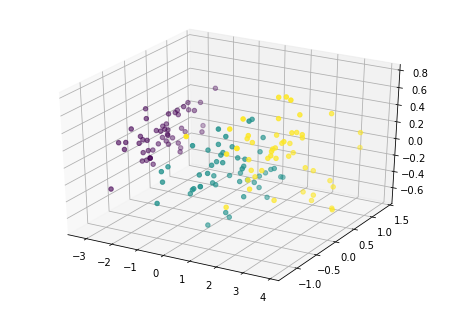

In [29]:
#绘制3D.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_reduced[:,0],X_reduced[:,1],X_reduced[:,2],c=iris.target)
plt.show()

In [33]:
#k近邻分类器
#先打乱数据，前130条数据作为训练集，后20条数据作为测试集
i = np.random.permutation(len(iris.data))
i

array([ 14,  77,  30, 105,  74, 133, 134,  12,  27, 131,  51,  49,  98,
        29, 113,  93,  38,  89,  43, 137,  64,  20, 110,  80, 140,   1,
        59, 115,  84,  39, 111, 132,  25,  45,  31,  46,  75,   0, 109,
        35, 141,  71,  13,  78,  18,  44, 126, 143, 103, 136, 135,  96,
        60,  95, 116,  86, 117,   8, 120,  88,  76, 112,  79,  70,  57,
       145,  47, 124,  55,   9,  62, 149,  81,  65,  94,  85, 142,  53,
       119,  82,  91,  58,  92,  23,  17, 100,  52,  32, 138,  24,  61,
       147,  19,   4,   6,  56,  73, 130, 104, 114,  48,  21,  40,   5,
        10,  50,  37,   2,  42,  69, 146, 108,  15, 148, 107,  68,  11,
       123,  99,  90, 144,  16, 128,  72, 102,  41,  22, 127,  33, 121,
        34,  26,   3, 125, 139,  67,   7,  36, 118,  28, 106, 129,  97,
        54,  87,  83, 101,  63,  66, 122])

In [36]:
i.size

150

In [37]:
x = iris.data
y = iris.target
x_train = x[i[:-10]]
y_train = y[i[:-10]]
x_test = x[i[-10:]]
y_test = y[i[-10:]]

In [38]:
#使用k-近邻算法分类器
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
model = classifier.fit(x_train,y_train)

In [39]:
#使用model做预测
model.predict(x_test)

array([1, 2, 1, 1, 1, 2, 2, 1, 1, 2])

In [40]:
y_test

array([2, 2, 1, 1, 1, 1, 2, 1, 1, 2])

In [41]:
#从结果看，正确率100%

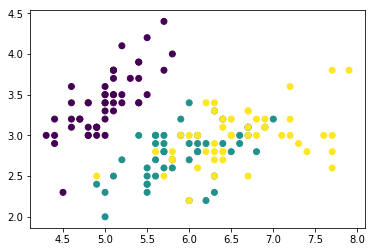

In [42]:
#在sepal 萼片长度和宽度绘制的散点图上，画出决策边界。
x = iris.data[:,0]
y = iris.data[:,1]
c = iris.target

#绘制决策边界

plt.scatter(x,y,c=c)
plt.show()

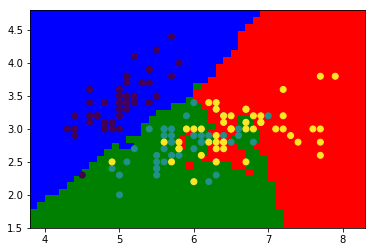

In [43]:
from matplotlib.colors import ListedColormap
#在sepal 萼片长度和宽度绘制的散点图上，画出决策边界。
x = iris.data[:,:2]
y = iris.target
c = iris.target
alpa =  0.1

#绘制决策边界
#1.找出x的最大最小值和y的最大值最小值
xmin,xmax = x[:,0].min()-0.5,x[:,0].max()+0.5
ymin,ymax = x[:,1].min()-0.5,x[:,1].max()+0.5
#使用x,y的最大最小值产生表格数据
xx,yy = np.meshgrid(np.arange(xmin,xmax,alpa),np.arange(ymin,ymax,alpa))
#使用原始的x,y训练得到Knn分类模型
classifier = KNeighborsClassifier()
model = classifier.fit(x,y)
#使用训练的模型预测xx,yy值
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
#绘制边界
colors = ListedColormap(['blue','green','red'])
#plt.pcolormesh(xx,yy,Z,cmap=plt.cm.hot)
plt.pcolormesh(xx,yy,Z,cmap=colors)
plt.scatter(x[:,0],x[:,1],c=c)
plt.show()

(234600,)


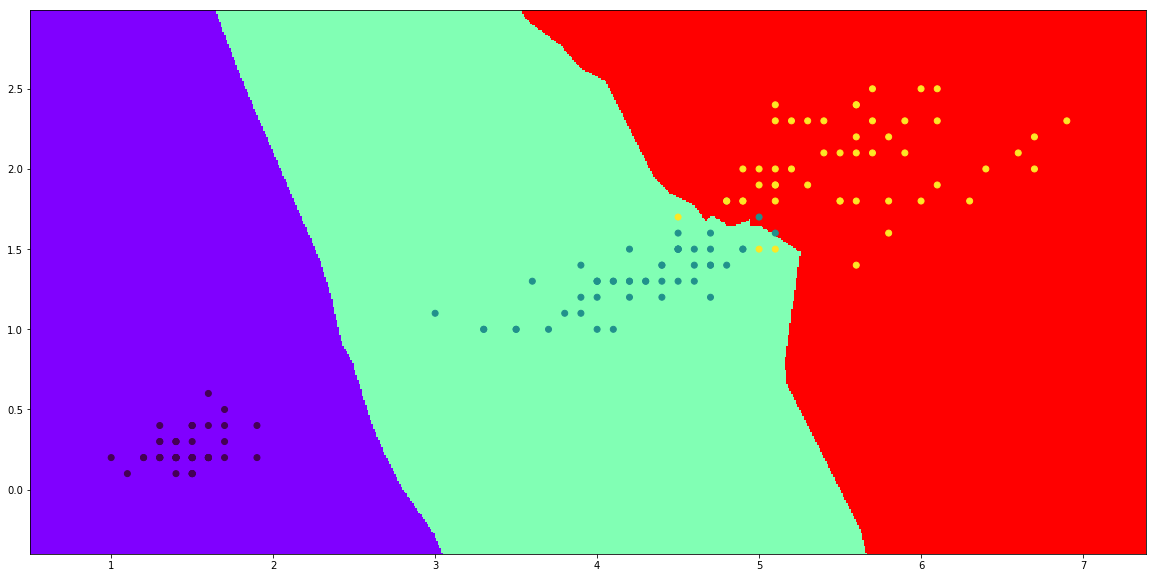

In [51]:
from matplotlib.colors import ListedColormap
#在sepal 萼片长度和宽度绘制的散点图上，画出决策边界。
x = iris.data[:,2:4]
y = iris.target
c = iris.target
alpa =  0.01
plt.figure(figsize=(20,10))
#绘制决策边界
#1.找出x的最大最小值和y的最大值最小值
xmin,xmax = x[:,0].min()-0.5,x[:,0].max()+0.5
ymin,ymax = x[:,1].min()-0.5,x[:,1].max()+0.5
#使用x,y的最大最小值产生表格数据
xx,yy = np.meshgrid(np.arange(xmin,xmax,alpa),np.arange(ymin,ymax,alpa))
#使用原始的x,y训练得到Knn分类模型
classifier = KNeighborsClassifier()
model = classifier.fit(x,y)
#使用训练的模型预测xx,yy值
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
print(Z.shape)
Z = Z.reshape(xx.shape)
#绘制边界
colors = ListedColormap(['blue','green','red'])
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.rainbow)
#plt.pcolormesh(xx,yy,Z,cmap=colors)
plt.scatter(x[:,0],x[:,1],c=c)
plt.show()

In [45]:
xx.shape

(34, 69)

In [48]:
yy.shape

(34, 69)